# Linear Regression with SciKit-Learn

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)

## Sample Data

This sample data is from ISLR. It displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

In [4]:
df = pd.read_csv('Advertising.csv')

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Expanding the Questions

Previously, we explored **Is there a relationship between *total* advertising spend and *sales*?** as well as predicting the total sales for some value of total spend. Now we want to expand this to **What is the relationship between each advertising channel (TV,Radio,Newspaper) and sales?**

### Multiple Features (N-Dimensional)

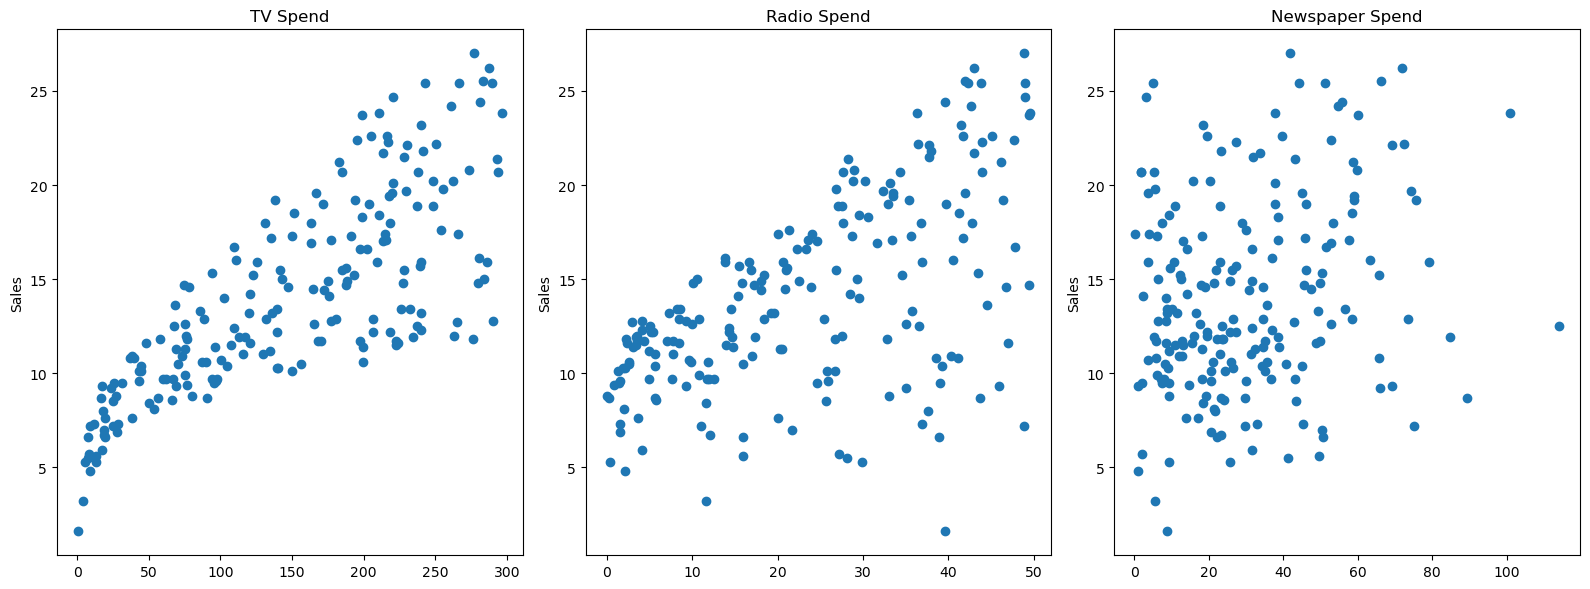

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_title('TV Spend')
axes[0].set_ylabel('Sales')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_title('Radio Spend')
axes[1].set_ylabel('Sales')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_title('Newspaper Spend')
axes[2].set_ylabel('Sales')

plt.tight_layout();

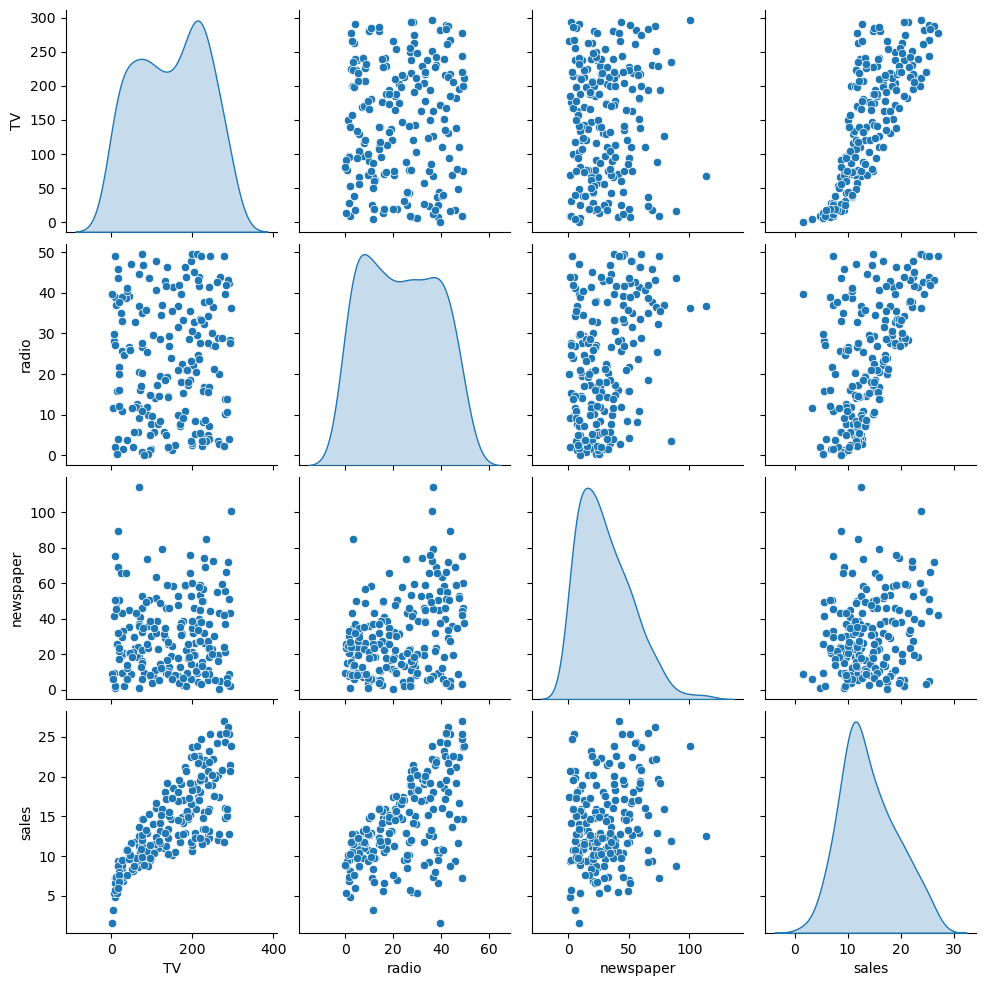

In [7]:
# Relationships between features
sns.pairplot(df, diag_kind='kde');

`sns.pairplot()` also compares relationship between each feature; which is something we'll keep in mind when we move on to polynomial regression -- if maybe there's some sort of synergy between running both radio ads and newspaper ads

## Introducing SciKit Learn

In [8]:
X = df.drop('sales', axis=1)

In [9]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [10]:
y = df['sales']

## Train | Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# random state:
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
len(df)

200

In [14]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [15]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [16]:
len(X_test)

60

### Creating a Model (Estimator)

**Import a model class from a model family**

In [17]:
from sklearn.linear_model import LinearRegression

**Create an instance of the model with parameters**

In [18]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [19]:
model = LinearRegression()

### Fit/Train the Model on the training data

**Fit the training data, in order to fairly evaluate the model's performance on future data**

In [20]:
model.fit(X_train, y_train)

LinearRegression()

# Understanding and utilizing the Model

----

## Evaluation on the Test set

### Metrics

The three most common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

### Calculate Performance on Test Set

We want to fairly evaluate our model, so we get performance metrics on the test set (data the model has never seen before).

In [21]:
# We only pass in test features
# The model predicts its own y hat
# We can then compare these results to the true y test label value
test_predictions = model.predict(X_test)

In [22]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [25]:
MAE

1.2137457736144803

In [26]:
MSE

2.2987166978863782

In [27]:
RMSE

1.516151937599388

In [28]:
df['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

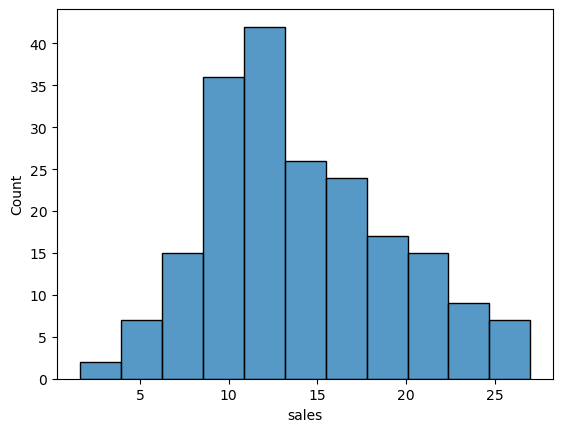

In [29]:
sns.histplot(data=df, x='sales')

using MAE to make sure on average you're doing pretty good 

using RMSE to make sure you're not super far off for just a few data points.

In [30]:
test_residuals = y_test - test_predictions

In [31]:
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

Negative values where I overestimated & positive values where I underestimated

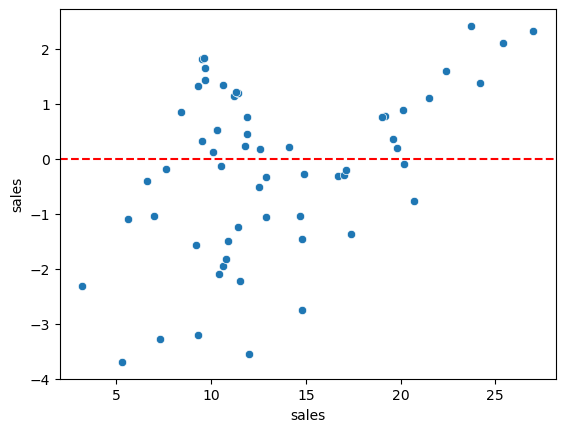

In [32]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')

Typical residual plot.
What we're looking for here, is to make sure there's no clear line or curve.

Residual plots should look random, no clear curve on this inorder to make sure the dataset is a valid choice for linear regression

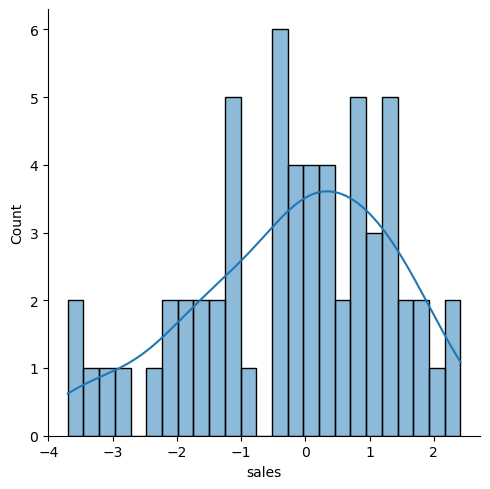

In [33]:
sns.displot(test_residuals, kde=True, bins=25)

In [34]:
import scipy as sp

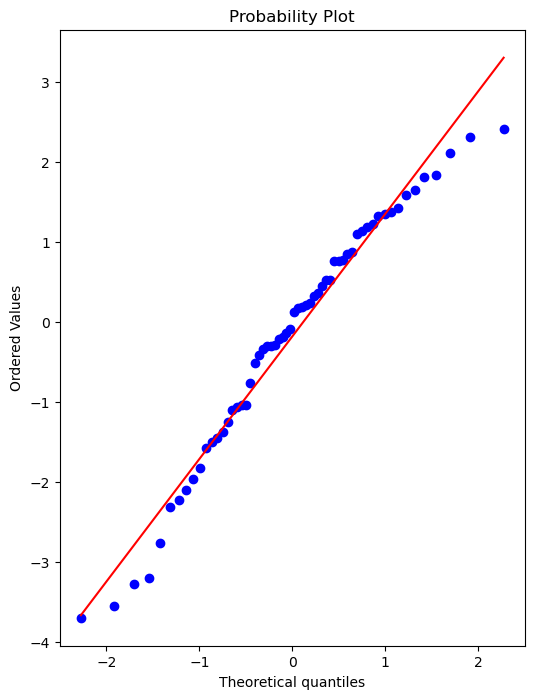

In [35]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8))
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals,plot=ax)

The red line, shows what a normal distribution should look like.

------

## Retraining Model on Full Data

In [36]:
final_model = LinearRegression()

In [37]:
final_model.fit(X, y)

LinearRegression()

## Deployment, Predictions, and Model Attributes

### Final Model Fit

Note, we can only do this since we only have 3 features, for any more it becomes unreasonable.


In [38]:
y_hat = final_model.predict(X)

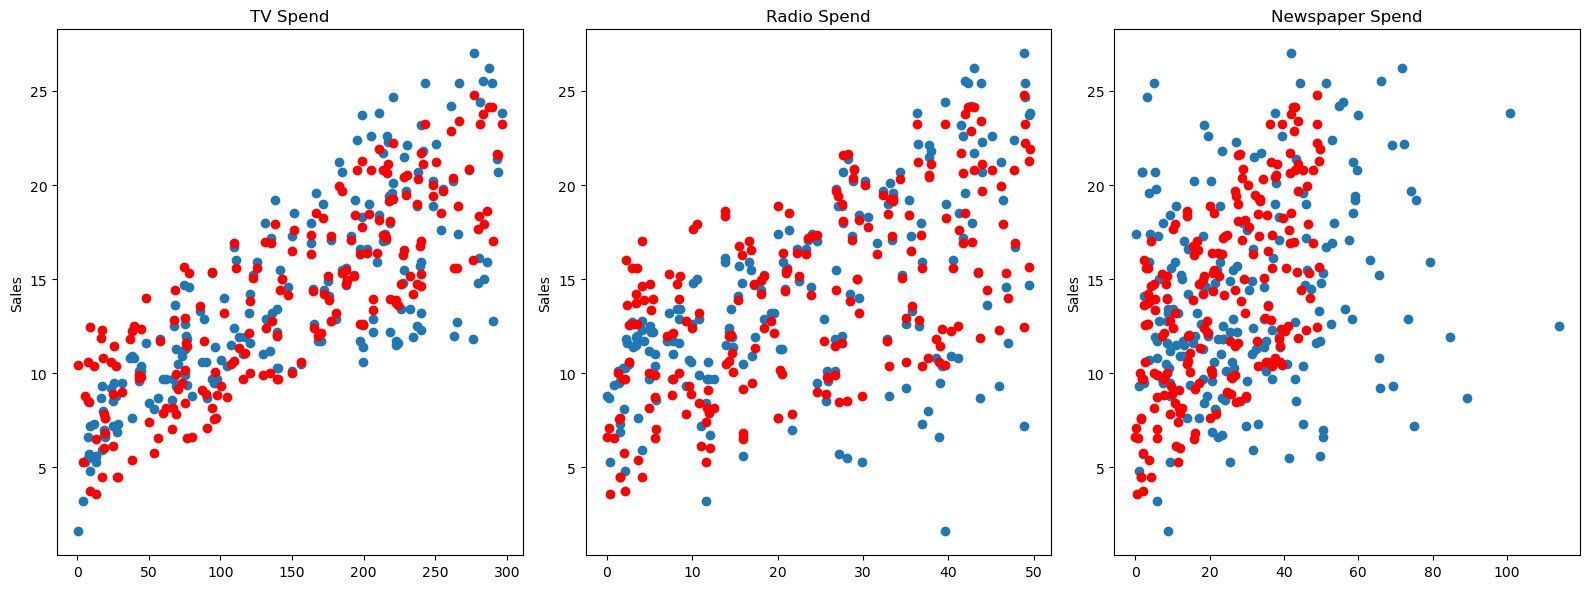

In [39]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

## Residuals

Should be normally distributed.

In [40]:
residuals = y_hat - y

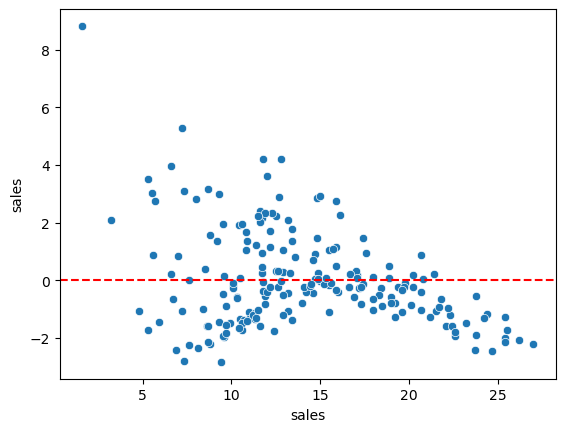

In [42]:
sns.scatterplot(x=y, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

### Coefficients

In [43]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [45]:
coeff_df = pd.DataFrame(final_model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


Interpreting the coefficients:

---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in TV Spend is associated with an increase in sales of  0.045 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on TV Ads, we could expect 45 more units sold.
----

---
---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Radio Spend is associated with an increase in sales of  0.188 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on Radio Ads, we could expect 188 more units sold.
----
----

* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Newspaper Spend is associated with a **decrease** in sales of  0.001 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on Newspaper Ads, we could actually expect to sell 1 less unit. Being so close to 0, this heavily implies that newspaper spend has no real effect on sales.
---
---

In [46]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Prediction on New Data

**Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [47]:
campaign = [[149, 22, 12]]

In [48]:
final_model.predict(campaign)

/home/dev/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

**How accurate is this prediction? No real way to know! We only know truly know our model's performance on the test data, that is why we had to be satisfied by it first, before training our full model**

-----

## Model Persistence (Saving and Loading a Model)

In [49]:
from joblib import dump, load

In [50]:
dump(final_model, 'sales_model.joblib')

['sales_model.joblib']

In [51]:
loaded_model = load('sales_model.joblib')

In [52]:
loaded_model.predict(campaign)

/home/dev/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])